In [1]:
using LinearAlgebra, DifferentialEquations, Plots;

In [2]:
begin

    const c1 = 1; # Spring constant
    const c2 = 1;
    const c3 = 1;
    const m1 = 5.0; # Mass
    const m2 = 5.0;
    const m3 = 5.0;
    const m4 = 5.0;
end


5.0

In [3]:
A = [0 0 0 0 1 0 0 0; 0 0 0 0 0 1 0 0 ; 0 0 0 0 0 0 1 0 ; 0 0 0 0 0 0 0 1 ; -c1/m1 c1/m1 0 0 0 0 0 0 ; c1/m2 -(c2+c1)/m2 c2/m2 0 0 0 0 0 ; 0 c2/m3 -(c2+c3)/m3 c3/m3 0 0 0 0 ; 0 0 c3/m4 -c3/m4 0 0 0 0] 


8×8 Matrix{Float64}:
  0.0   0.0   0.0   0.0  1.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0  0.0  1.0  0.0  0.0
  0.0   0.0   0.0   0.0  0.0  0.0  1.0  0.0
  0.0   0.0   0.0   0.0  0.0  0.0  0.0  1.0
 -0.2   0.2   0.0   0.0  0.0  0.0  0.0  0.0
  0.2  -0.4   0.2   0.0  0.0  0.0  0.0  0.0
  0.0   0.2  -0.4   0.2  0.0  0.0  0.0  0.0
  0.0   0.0   0.2  -0.2  0.0  0.0  0.0  0.0

In [4]:
B = [0 0 0 0 ; 0 0 0 0 ; 0 0 0 0; 0 0 0 0; 1/m1 0 0 0 ; 0 1/m2 0 0; 0 0 1/m3 0 ; 0 0 0 1/m4] # Input matrix

8×4 Matrix{Float64}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.2  0.0  0.0  0.0
 0.0  0.2  0.0  0.0
 0.0  0.0  0.2  0.0
 0.0  0.0  0.0  0.2

In [5]:
C = [1 0 0 0 0 0 0 0 ; 0 1 0 0 0 0 0 0 ; 0 0 1 0 0 0 0 0; 0 0 0 1 0 0 0 0 ; ] # Output matrix

4×8 Matrix{Int64}:
 1  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0
 0  0  1  0  0  0  0  0
 0  0  0  1  0  0  0  0

In [6]:
ev = eigvals(A) # Eigenvalues

8-element Vector{ComplexF64}:
 -2.8365973522275683e-9 + 0.0im
 -3.975445657643428e-17 - 0.8263429750863854im
 -3.975445657643428e-17 + 0.8263429750863854im
 -3.056834910828536e-17 - 0.6324555320336758im
 -3.056834910828536e-17 + 0.6324555320336758im
 -6.911788849595091e-18 - 0.3422824674525138im
 -6.911788849595091e-18 + 0.3422824674525138im
  2.8365973146173475e-9 + 0.0im

In [7]:
# Definition of ODE
function mech_oscillator(dx,x,p,t)
  
  u1 = .5;                         # Control inputs
  u2 = 1.5; 
  u3 = 2.5; 
  u4 = 3.5;
  u = [u1; u2; u3; u4]

  dx .= A*x + B*u # Right-hand side of ODE
end

mech_oscillator (generic function with 1 method)

In [8]:
x₀ = [1.0; 2.0; 0; 0; 0; 0; 0; 0]; # Initial values

In [9]:
tspan = (0.0, 100.0); # Time span

In [10]:
#Build ODE Problem
prob = ODEProblem(mech_oscillator,x₀,tspan, A);

# Results

In [11]:
sol = solve(prob); # Solve ODE Problem


In [12]:
y = C * sol; # Calculate system output


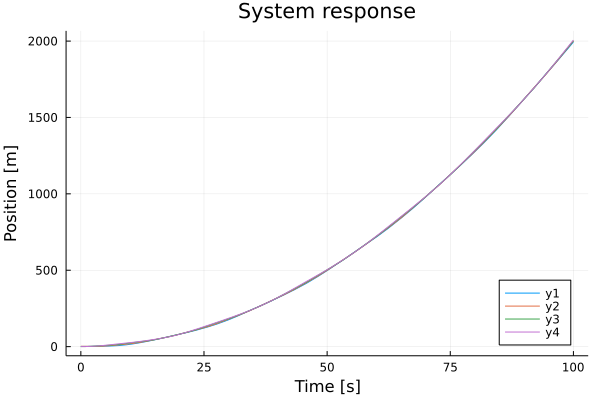

In [13]:
plot(sol.t, transpose(y), title="System response", xaxis="Time [s]", yaxis="Position [m]", legend =:bottomright)


In [14]:
savefig("MS")